<a href="https://colab.research.google.com/github/enochbayode/TEOS-10/blob/main/TEOS_10_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gsw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.8 MB/s eta 0:00:00


# Import libraries and framework

In [3]:
import statsmodels.api as sm
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gsw
import seaborn as sns
sns.set()

specifying the file path

In [9]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data


In [11]:
#file_path = r'C:\Users\Enoch\Documents\Final year project\Data analysis\GLODAPv2.2022_Atlantic_Ocean_GOG.xlsx'
dataset = pd.read_excel("GLODAPv2.2022_Atlantic_Ocean_GOG.xlsx")


Specify the range you want to filter (for example, 4.008 to 10.00 in a column named 'your_column')
Latitude: 3° to 7° North
Longitude: 3° to 9° East

In [12]:
# Specify the range you want to filter (for example, 4.008 to 10.00 in a column named 'your_column')
#Latitude: 3° to 7° North
#Longitude: 3° to 9° East

latitude_range = (3.00, 7.000)
longitude_range = (3.000, 9.000)

Filtering the DataFrame based on the specified range using the longitude and latitude range for the gulf of guinea

In [13]:
# Filter the DataFrame based on the specified range
filtered_df = dataset[
    (dataset['G2latitude'] >= latitude_range[0]) & (dataset['G2latitude'] <= latitude_range[1])
      & (dataset['G2longitude'] >= longitude_range[0]) & (dataset['G2longitude'] <= longitude_range[1])
      ]

selected_columns = ['G2latitude', 'G2longitude', 'G2salinity', 'G2temperature', 'G2pressure',
                    'G2depth', 'G2day', 'G2hour','G2month','G2year','G2oxygen']
data = filtered_df[selected_columns]
print (data)

        G2latitude  G2longitude  G2salinity  G2temperature  G2pressure  \
288890      3.6800       6.0000      34.080         28.300         1.0   
288903      5.0800       5.0800      34.190         28.400         1.0   
288923      3.0000       6.0000      34.200         28.540         1.0   
288962      3.0000       6.0000      32.120         26.440         1.0   
297354      3.7510       6.0033      33.443         26.025         4.0   
297355      3.7510       6.0033      35.691         16.504        61.0   
297356      3.7510       6.0033      35.444         14.328       166.0   
297357      3.4998       6.0022      34.881         26.028         2.0   
297358      3.4998       6.0022      35.868         18.495        51.0   
297359      3.4998       6.0022      35.629         15.833       100.0   
297360      3.4998       6.0022      35.396         14.036       200.0   
297361      3.4998       6.0022      35.009         10.434       300.0   
297362      3.4998       6.0022      3

In [14]:
# Preprocess the data
X = data[['G2pressure', 'G2temperature', 'G2longitude', 'G2latitude']].values
y = data[['G2salinity']].values

In [15]:
x = sm.add_constant(X) # adding a constant

# Fit the model
model = sm.OLS(y, x).fit()
model.predict(x)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.111
Date:                Sun, 26 May 2024   Prob (F-statistic):              0.365
Time:                        13:37:18   Log-Likelihood:                -41.702
No. Observations:                  44   AIC:                             93.40
Df Residuals:                      39   BIC:                             102.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4875      8.385      4.113      0.0

Picking out various parameters using the filtered data

In [16]:
pressure = data['G2pressure'].values

temperature = data['G2temperature'].values

P_salinity = data['G2salinity'].values #practical salinity

time = data['G2year'].values

depth = data['G2depth'].values

oxygen = data['G2oxygen'].values  # Dissolved Oxygen concentration values

latitude = data['G2latitude'].values

Calculating the potential density from practical salinity, temperaure, and pressure using gsw

In [17]:
# Calculate potential density
density = gsw.rho(P_salinity, temperature, pressure) #
print (density)

[1021.50646303 1021.55447421 1021.51586289 1020.65632218 1021.77311137
 1026.29808592 1027.06333834 1022.82533695 1025.90171246 1026.57782019
 1027.23946634 1028.10114007 1028.7223578  1029.29632132 1030.46895409
 1030.46912344 1022.96476075 1023.13713357 1025.74091971 1026.57868386
 1027.30736701 1028.08193488 1028.7097684  1029.25769561 1030.82597108
 1031.89569677 1032.8913104  1033.98356829 1033.98459057 1035.03420478
 1023.14867    1023.23065344 1025.68405216 1026.52735743 1027.25903364
 1028.0421646  1029.25695735 1030.82602501 1031.87202807 1033.44705627
 1034.46094989 1035.39110059 1035.39154839 1036.30684143]


Calculating the absolute salinity from practical salinity and pressure using gsw

In [18]:
# Calculate Absolute Salinity from pratical salinity
absolute_salinity = gsw.SA_from_SP(P_salinity, pressure, 0, 0)
for k in absolute_salinity:
    print (k)

34.24125075881002
34.35177122780852
34.36181854317203
32.2719769475639
33.6012340345759
35.8601691433518
35.61250970170844
35.04603976835808
36.037963901344135
35.79811874934412
35.5644498487519
35.17622220815389
34.949823643381116
34.80764558201524
34.72227083648646
34.72227115144932
35.141489261721055
35.28213854519099
36.13240489850193
35.82122792252425
35.56947364379213
35.19832729223453
34.98499150778379
34.84582838655658
34.69936094214584
34.80498863838848
34.90390629785107
35.10123283472029
35.10123255494793
35.12418686142187
35.33640717448335
35.33639719804211
36.08116323647469
35.843332349044374
35.55942605371167
35.2264610356099
34.850852439785704
34.701370635238746
34.78187708892741
35.02013010995426
35.11815827029579
35.12621270033539
35.12621272139531
35.12641005625766


Calculating the potential density from practical salinity, temperaure, and pressure using gsw

In [19]:
# Calculate potential temperature
potential_temperature = 273.15 + 15 # assuming 15 degrees Celsius
print (potential_temperature)

288.15


Calculating the conservative_temperature from pratical salinity, temperature, and pressure using gsw

In [20]:
# Calculate Conservative Temperature (CT)
conservative_temperature = gsw.CT_from_t(P_salinity, temperature, pressure)

for j in conservative_temperature:
    print (j)

28.35128494243512
28.447072769568244
28.587131626175307
26.561515504790197
26.092540636462175
16.470007700019757
14.28611099068409
26.040452461168314
18.45676534640386
15.794892925389185
13.990692256631908
10.39069809191669
8.371830394534285
6.8770308459838025
5.691445569049677
5.693424827684021
25.813305077014967
25.814164089962603
19.33779182927105
15.866227588545817
13.691041744932098
10.587804495264939
8.612482897608405
7.324699307252232
5.083605815305089
4.482855319628535
4.36972651877346
4.090911829040748
4.0869485063964985
3.85974057876114
25.674607348469248
25.679191293416405
19.410335330880944
16.1583956290112
13.881979635237155
10.917476231233657
7.354505081699839
5.094510548941949
4.524804462602711
4.2602488765076805
3.9827363673411122
3.78348748979375
3.7834781532442445
3.4459973528336953


Graph of Temperature against Salinity

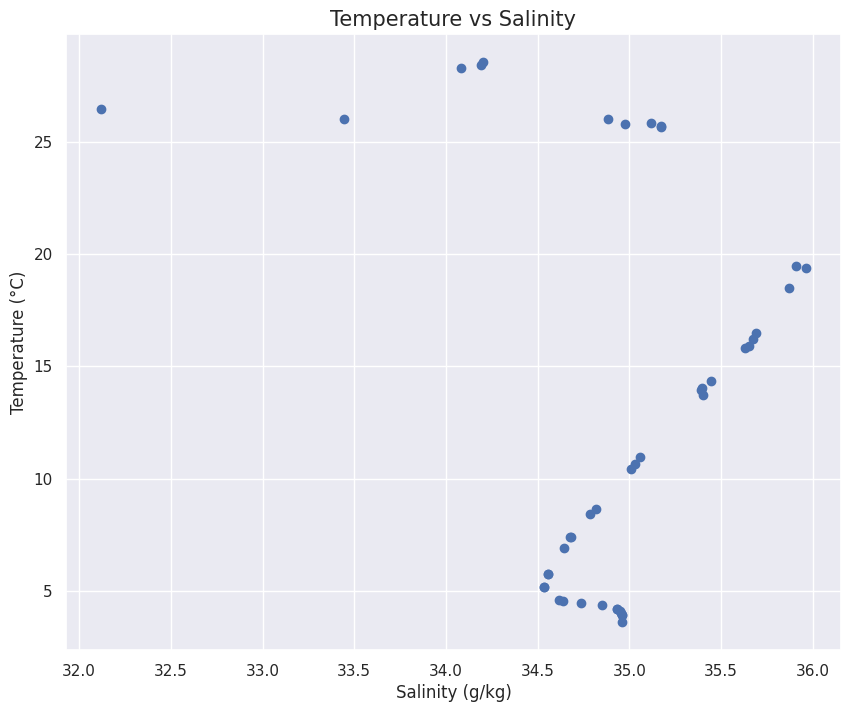

In [21]:
# Plot the data
plt.figure(figsize=(10,8))

# Plot temperature
#plt.plot(time, temperature, label='Temperature (°C)', color='red')
# Plot salinity
#plt.plot(time, P_salinity, label='Salinity (psu)', color='blue')

plt.scatter(P_salinity, temperature) # X, y
plt.xlabel('Salinity (g/kg)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Salinity', size = '15')
plt.grid(True)
plt.show()

Graph of Latitude against temperature

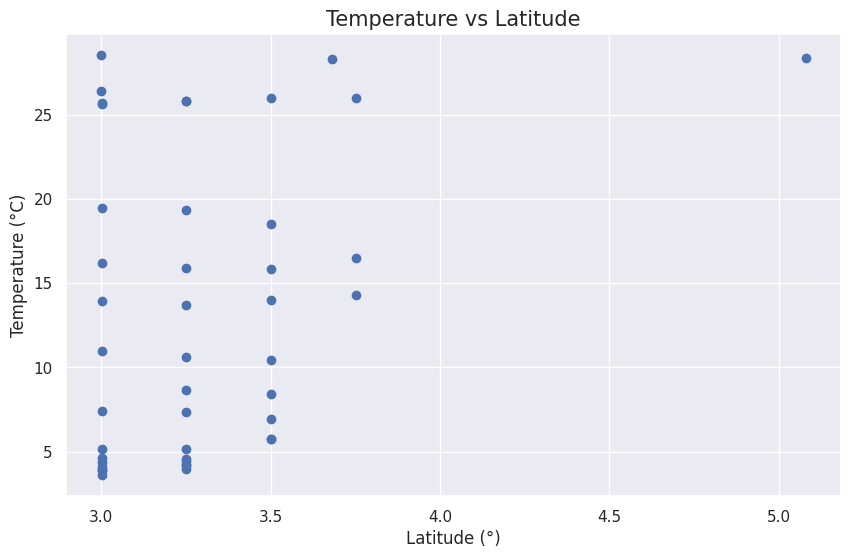

In [22]:
# Plot the data
plt.figure(figsize=(10,6))

# Plot temperature
#plt.plot(time, temperature, label='Temperature (°C)', color='red')
# Plot salinity
#plt.plot(time, P_salinity, label='Salinity (psu)', color='blue')

plt.scatter(latitude, temperature) # X, y
plt.xlabel('Latitude (°)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Latitude', size = '15')
plt.grid(True)
plt.show()

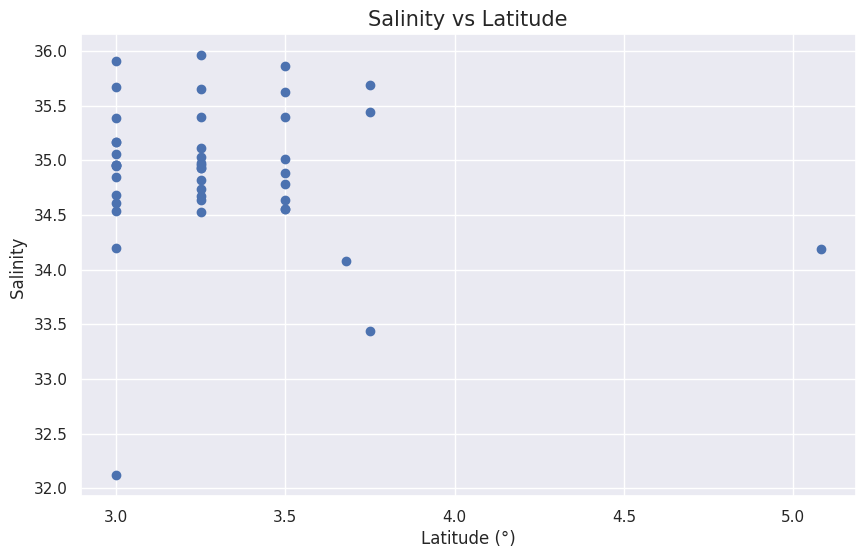

In [23]:
# Plot the data
plt.figure(figsize=(10,6))

# Plot temperature
#plt.plot(time, temperature, label='Temperature (°C)', color='red')
# Plot salinity
#plt.plot(time, P_salinity, label='Salinity (psu)', color='blue')

plt.scatter(latitude, P_salinity) # X, y
plt.xlabel('Latitude (°)')
plt.ylabel('Salinity ')
plt.title('Salinity vs Latitude', size = '15')
plt.grid(True)
plt.show()

Graph of conservative temperature agianst pressure

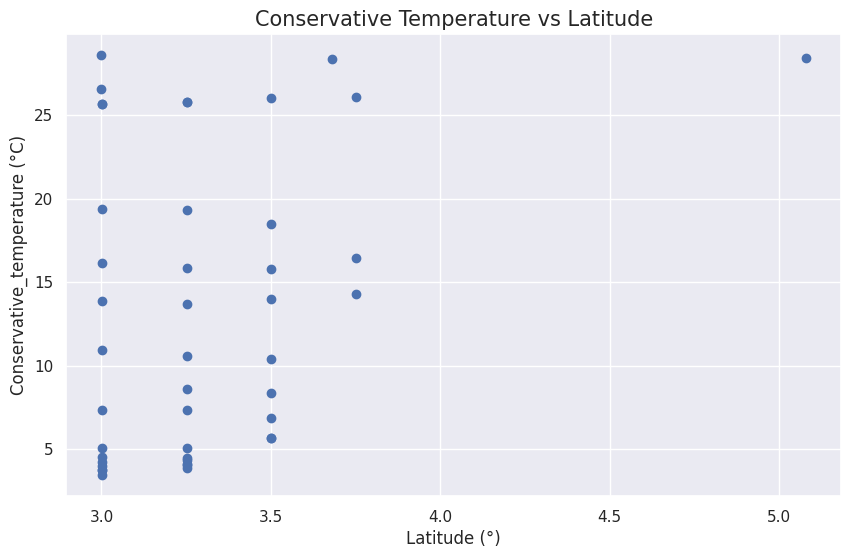

In [24]:
# Plot the data
plt.figure(figsize=(10,6))

# Plot temperature
#plt.plot(time, temperature, label='Temperature (°C)', color='red')
# Plot salinity
#plt.plot(time, P_salinity, label='Salinity (psu)', color='blue')

plt.scatter(latitude, conservative_temperature) # X, y
plt.xlabel('Latitude (°)')
plt.ylabel('Conservative_temperature (°C)')
plt.title('Conservative Temperature vs Latitude', size = '15')
plt.grid(True)
plt.show()

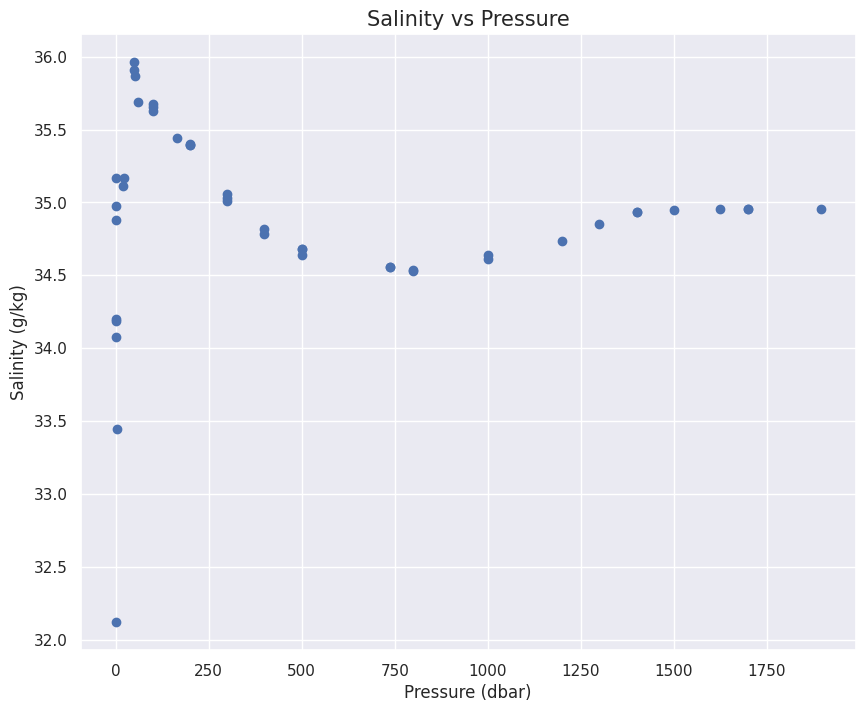

In [25]:
# Plot the data
plt.figure(figsize=(10,8))

# Plot temperature
#plt.plot(time, temperature, label='Temperature (°C)', color='red')
# Plot salinity
#plt.plot(time, P_salinity, label='Salinity (psu)', color='blue')

plt.scatter(pressure, P_salinity) # X, y
plt.xlabel('Pressure (dbar)')
plt.ylabel('Salinity (g/kg)')
plt.title('Salinity vs Pressure', size = '15')
plt.grid(True)
plt.show()

Graph of absolute salinity against pressure

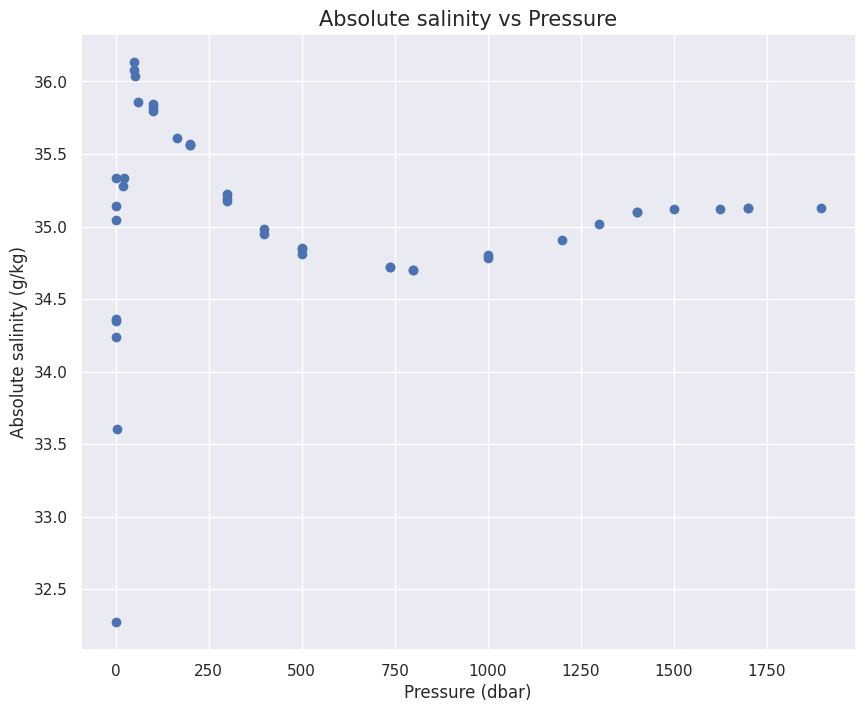

In [26]:
# Plot the data
plt.figure(figsize=(10,8))

# Plot temperature
#plt.plot(time, temperature, label='Temperature (°C)', color='red')
# Plot salinity
#plt.plot(time, P_salinity, label='Salinity (psu)', color='blue')

plt.scatter(pressure, absolute_salinity) # X, y
plt.xlabel('Pressure (dbar)')
plt.ylabel('Absolute salinity (g/kg)')
plt.title('Absolute salinity vs Pressure', size = '15')
plt.grid(True)
plt.show()

Graph of depth against pressure

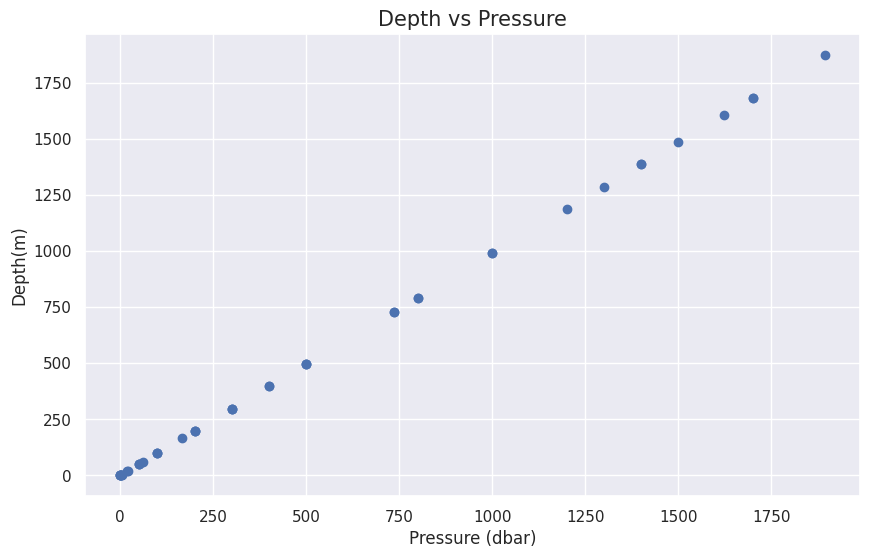

In [27]:
# Plot the data
plt.figure(figsize=(10,6))

# Plot temperature
#plt.plot(time, temperature, label='Temperature (°C)', color='red')
# Plot salinity
#plt.plot(time, P_salinity, label='Salinity (psu)', color='blue')

plt.scatter(pressure, depth) # X, y
plt.xlabel('Pressure (dbar)')
plt.ylabel('Depth(m)')
plt.title('Depth vs Pressure', size = '15')
plt.grid(True)
plt.show()

Calculate dissolved oxygen from conservative temperature and pratical salinity salinity using GSW

In [28]:
import gsw

salinity_PSU = 35.16504 * P_salinity

def calculate_dissolved_oxygen(temperature_C, salinity_PSU):
    # Convert temperature from Celsius to Kelvin
    temperature_K = temperature_C + 273.15

    # Calculate the solubility of oxygen in µmol/kg
    O2_solubility = gsw.O2sol_SP_pt(salinity_PSU, temperature_C)

    # Convert from µmol/kg to mg/L (1 µmol/kg = 0.031606 mg/L)
    dissolved_oxygen_mg_per_L = O2_solubility * 0.031606
    return dissolved_oxygen_mg_per_L

# Example usage:
#temperature = 25  # Temperature in Celsius
# salinity = 35     # Salinity in Practical Salinity Units (PSU)
# pressure = 0      # Pressure in decibars (dbar)

dissolved_oxygen = calculate_dissolved_oxygen(conservative_temperature, P_salinity)

for i in dissolved_oxygen:
    print(i)

#mg/L

D_oxygen = pd.DataFrame({'values':dissolved_oxygen})
D_oxygen_values = D_oxygen.values

6.223010191657597
6.209176973078608
6.1949171407848285
6.486575708118302
6.481952949647626
7.575296815612331
7.918164975941634
6.4281202944284175
7.288924819681656
7.677545064417136
7.967571423422374
8.605973804919012
9.00707146712007
9.32472016545822
9.589420263540893
9.588977360946588
6.448332541773858
6.442458871917704
7.167584845255773
7.665754676276982
8.015265841734715
8.568558521371923
8.956968497931017
9.227798411941851
9.728883200947767
9.860882847603147
9.8802301425268
9.931776494451796
9.932722654793572
9.985502657513882
6.455105253319575
6.454615643163078
7.160574154704983
7.621567451837495
7.985191365530681
8.507172814710037
9.221243026440055
9.726233856375643
9.852715933485872
9.897527746794465
9.956383563923312
10.003762758199048
10.003765016169467
10.085982663675598


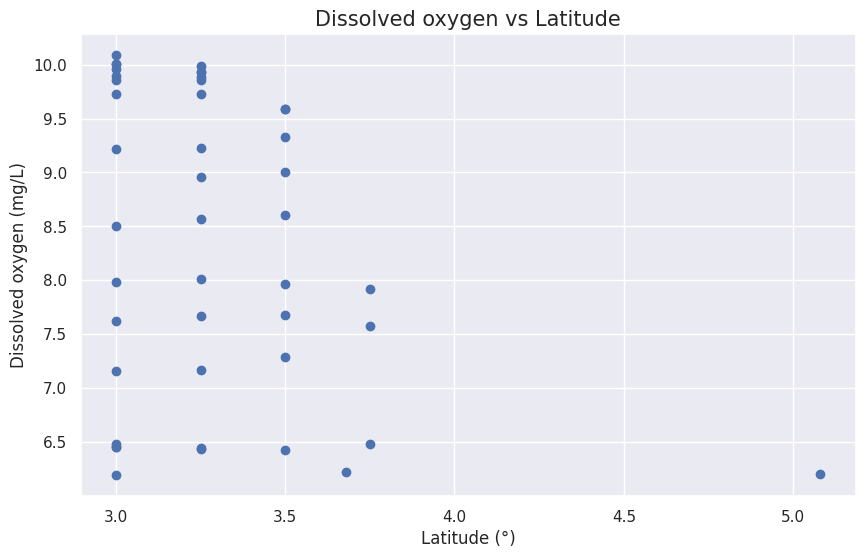

In [29]:
# Plot the data
plt.figure(figsize=(10,6))

# Plot temperature
#plt.plot(time, temperature, label='Temperature (°C)', color='red')
# Plot salinity
#plt.plot(time, P_salinity, label='Salinity (psu)', color='blue')

plt.scatter(latitude, D_oxygen_values) # X, y
plt.xlabel('Latitude (°)')
plt.ylabel('Dissolved oxygen (mg/L)')
plt.title('Dissolved oxygen vs Latitude', size = '15')
plt.grid(True)
plt.show()

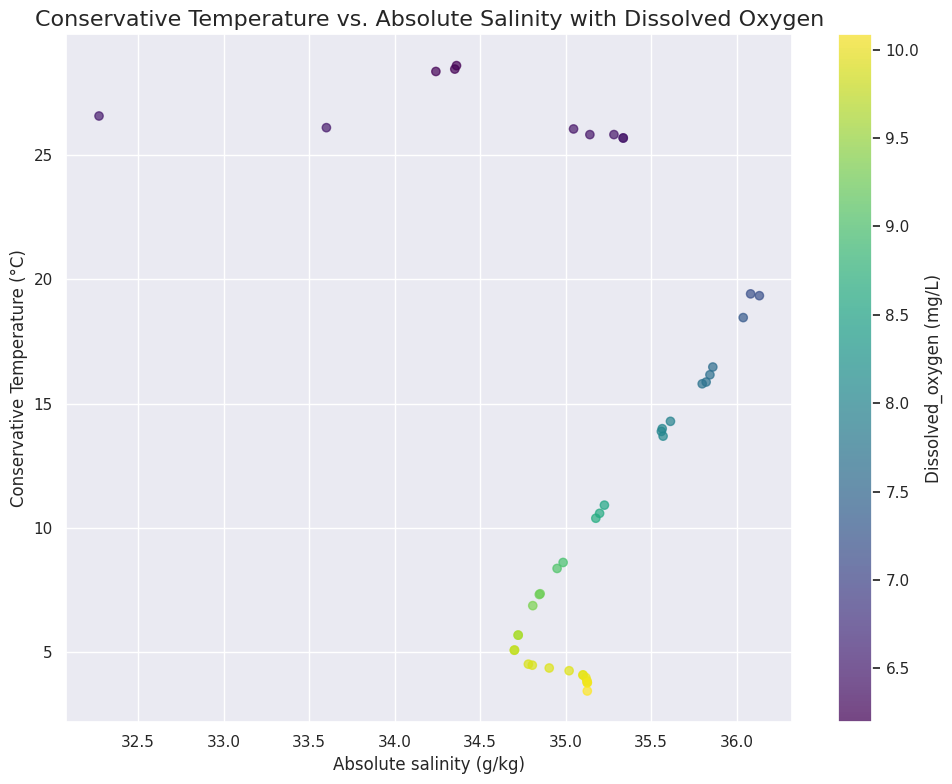

In [30]:

# Plotting
plt.figure(figsize=(10, 8))

plt.scatter(absolute_salinity, conservative_temperature, c=dissolved_oxygen, cmap='viridis', alpha=0.7)
plt.colorbar(label='Dissolved_oxygen (mg/L)')
plt.xlabel('Absolute salinity (g/kg)')
plt.ylabel('Conservative Temperature (°C)')
plt.title('Conservative Temperature vs. Absolute Salinity with Dissolved Oxygen', size = '16')

plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
